<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/GAN_Experiment_Combine_NASA_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"imajipietersz","key":"a867e2513f7abed17b6257011d4c5467"}'}

In [ ]:
!pip install kaggle
!ls -lha kaggle.json

!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vinayak123tyagi/bearing-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
-rw-r--r-- 1 root root 69 May 21 04:27 kaggle.json
/content
bearing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "bearing-dataset.zip"

with ZipFile(file_name, 'r') as zip1:
  zip1.extractall()
  print('Done')

Done


In [ ]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os


In [ ]:
def compute_skewness(x):
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

def compute_kurtosis(x):  
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [ ]:
Time_feature_matrix=pd.DataFrame()
test_set=2
bearing_no=1
path='2nd_test/2nd_test'


In [ ]:
for filename in os.listdir(path):
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])
   
    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], axis=0)

In [ ]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

In [ ]:
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [ ]:
# x is my training data
# mu is the mean
# std is the standard deviation
mu=0.0
std = 0.1
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 

NOISY DATA

In [ ]:
noisy_df = gaussian_noise(Time_feature_matrix, mu,std)
noisy_df


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.218039,-0.139900,0.059950,0.108990,0.133014,0.046870,0.500320,6.237139,-7.257944
2004-02-12 10:42:00,0.397299,-0.285846,-0.076750,-0.055294,0.083049,-0.032416,0.657113,4.966111,-29.285906
2004-02-12 10:52:00,0.284997,-0.345386,0.112237,0.078574,0.005004,-0.185396,0.522650,6.854613,-30.611915
2004-02-12 11:02:00,0.642312,-0.566787,-0.063646,-0.018223,-0.000581,0.077474,1.056510,7.998010,-34.845972
2004-02-12 11:12:00,0.254165,-0.382625,0.112069,0.090072,-0.063032,0.208052,0.533220,4.898356,-32.618161
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.931681,-5.036754,-0.086508,0.877063,0.768472,-0.447264,12.581142,6.936346,-263.346799
2004-02-19 05:52:00,2.713698,-2.935855,-0.087772,0.535206,0.572086,-0.415653,3.773269,5.753819,-102.934383
2004-02-19 06:02:00,3.548879,-3.665692,0.143891,0.448861,0.518164,-0.479716,4.838386,7.076682,-284.144812
2004-02-19 06:12:00,-0.101210,-0.133247,-0.005517,-0.250215,-0.009264,0.604676,3.746655,2.393030,1.191382


In [ ]:
# 1- pure
#0 - noisy

Time_feature_matrix = Time_feature_matrix.assign(target=1)
Time_feature_matrix = Time_feature_matrix.assign(target2=0)
Time_feature_matrix.head()

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target,target2
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,1,0
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,1,0
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,1,0
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,1,0
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,1,0


In [ ]:

Time_feature_matrix.dtypes

Max             float64
Min             float64
Mean            float64
Std             float64
RMS             float64
Skewness        float64
Kurtosis        float64
Crest Factor    float64
Form Factor     float64
target            int64
target2           int64
dtype: object

In [ ]:

noisy_df = noisy_df.assign(target=0)
noisy_df = noisy_df.assign(target2=1)
noisy_df.head()

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target,target2
2004-02-12 10:32:00,0.218039,-0.139900,0.059950,0.108990,0.133014,0.046870,0.500320,6.237139,-7.257944,0,1
2004-02-12 10:42:00,0.397299,-0.285846,-0.076750,-0.055294,0.083049,-0.032416,0.657113,4.966111,-29.285906,0,1
2004-02-12 10:52:00,0.284997,-0.345386,0.112237,0.078574,0.005004,-0.185396,0.522650,6.854613,-30.611915,0,1
2004-02-12 11:02:00,0.642312,-0.566787,-0.063646,-0.018223,-0.000581,0.077474,1.056510,7.998010,-34.845972,0,1
2004-02-12 11:12:00,0.254165,-0.382625,0.112069,0.090072,-0.063032,0.208052,0.533220,4.898356,-32.618161,0,1


In [ ]:
from pandas.core.algorithms import IndexLabel
Mixed_set=pd.DataFrame()
Mixed_set = pd.concat([Time_feature_matrix,noisy_df ], axis=0)
Mixed_set = Mixed_set.reset_index(drop=True)
Mixed_set.head(6)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target,target2
0,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,1,0
1,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,1,0
2,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,1,0
3,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,1,0
4,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,1,0
5,0.439,-0.366,-0.001623,0.078300,0.078315,0.026851,0.455756,5.605593,-48.250169,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Mixed_set = pd.DataFrame(scaler.fit_transform(Mixed_set.values), columns=Mixed_set.columns)
Mixed_set

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target,target2
0,0.108881,0.923363,0.543477,0.294453,0.302845,0.620126,0.142401,0.655244,0.836675,1.0,0.0
1,0.092212,0.922966,0.554927,0.296089,0.304053,0.596890,0.143644,0.489131,0.819289,1.0,0.0
2,0.118491,0.920584,0.555079,0.296836,0.304904,0.582786,0.135068,0.720065,0.818076,1.0,0.0
3,0.139082,0.885641,0.555391,0.299032,0.307408,0.589116,0.176065,0.872547,0.814985,1.0,0.0
4,0.096527,0.922371,0.555199,0.298810,0.307158,0.579441,0.140774,0.500991,0.816521,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1963,0.986994,0.000000,0.428673,1.000000,1.000000,0.232546,0.902833,0.765871,0.633257,0.0,1.0
1964,0.552028,0.417114,0.426772,0.699851,0.802805,0.255608,0.342477,0.605556,0.760685,0.0,1.0
1965,0.715815,0.272211,0.775284,0.624039,0.748660,0.208869,0.410240,0.784896,0.616735,0.0,1.0
1966,0.000000,0.973545,0.550516,0.010252,0.219058,1.000000,0.340784,0.149933,0.843401,0.0,1.0


In [ ]:
Mixed_set.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crest Factor', 'Form Factor', 'target', 'target2'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
frames = Mixed_set[['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis','Crest Factor', 'Form Factor']].values
labels = Mixed_set[['target', 'target2']].values
train_data,test_data, train_labels, test_labels =  train_test_split(frames, labels,train_size=0.7, random_state=42 )
print(len(train_data))
print(len(test_data))
print(len(train_labels))
print(len(test_labels))

1377
591
1377
591


In [ ]:
def plotUsingAutoEncoder(model,df):
  
  denoised_all = []

  for _,frame in df.iterrows():
    row_array = frame.values[:9]
    encoded_data = model.encoder(np.array([row_array])).numpy()
    [values] = model.decoder(encoded_data).numpy()
    denoised_all.append(values)
  separated_max = [x[0] for x in denoised_all]
  separated_min = [x[1] for x in denoised_all]
  separated_mean = [x[2] for x in denoised_all]
  separated_std = [x[3] for x in denoised_all]
  separated_rms = [x[4] for x in denoised_all]
  separated_skewness = [x[5] for x in denoised_all]
  separated_kurtosis = [x[6] for x in denoised_all]
  separated_crest = [x[7] for x in denoised_all]
  separated_form = [x[8] for x in denoised_all]
  
  
  df['separated_max'] = pd.DataFrame(separated_max, columns=['separated_max']) 
  df['separated_min'] = pd.DataFrame(separated_min, columns=['separated_min'])
  df['separated_mean'] = pd.DataFrame(separated_mean, columns=['separated_mean']) 
  df['separated_std'] = pd.DataFrame(separated_std, columns=['separated_std']) 
  df['separated_rms'] = pd.DataFrame(separated_rms, columns=['separated_rms']) 
  df['separated_skewness'] = pd.DataFrame(separated_skewness, columns=['separated_skewness']) 
  df['separated_kurtosis'] = pd.DataFrame(separated_kurtosis, columns=['separated_kurtosis']) 
  df['separated_crest'] = pd.DataFrame(separated_crest, columns=['separated_crest']) 
  df['separated_form'] = pd.DataFrame(separated_form, columns=['separated_form'])
 
   
  scaler.fit(df.values)
  df = pd.DataFrame(scaler.inverse_transform(df.values), columns=df.columns)
  noise = df[['RMS']].values.flatten()
  seperated = df[['separated_rms']].values.flatten()

  plt.figure(figsize=(20,5)) 
  plt.plot(noise)
  plt.plot(seperated, color="red")
  plt.legend(labels=["Input", "Reconstruction" ])
  plt.show()


#*_With 1D 2 CNN Layers & 1 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=4, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=4, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])
    

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(4, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=30, validation_data=(test_data, test_labels))


Epoch 1/30
44/44 [==============================] - 2s 11ms/step - loss: 0.6960 - accuracy: 0.4953 - val_loss: 0.6937 - val_accuracy: 0.5212
Epoch 2/30
44/44 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.4982 - val_loss: 0.6933 - val_accuracy: 0.6007
Epoch 3/30
44/44 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.4967 - val_loss: 0.6938 - val_accuracy: 0.4788
Epoch 4/30
44/44 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4822 - val_loss: 0.6930 - val_accuracy: 0.4450
Epoch 5/30
44/44 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.4975 - val_loss: 0.6928 - val_accuracy: 0.4704
Epoch 6/30
44/44 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.4989 - val_loss: 0.6923 - val_accuracy: 0.4755
Epoch 7/30
44/44 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.4938 - val_loss: 0.6918 - val_accuracy: 0.4585
Epoch 8/30
44/44 [=

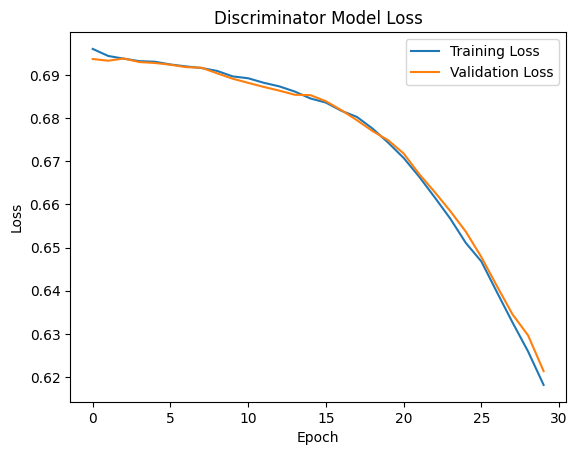

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 3
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE


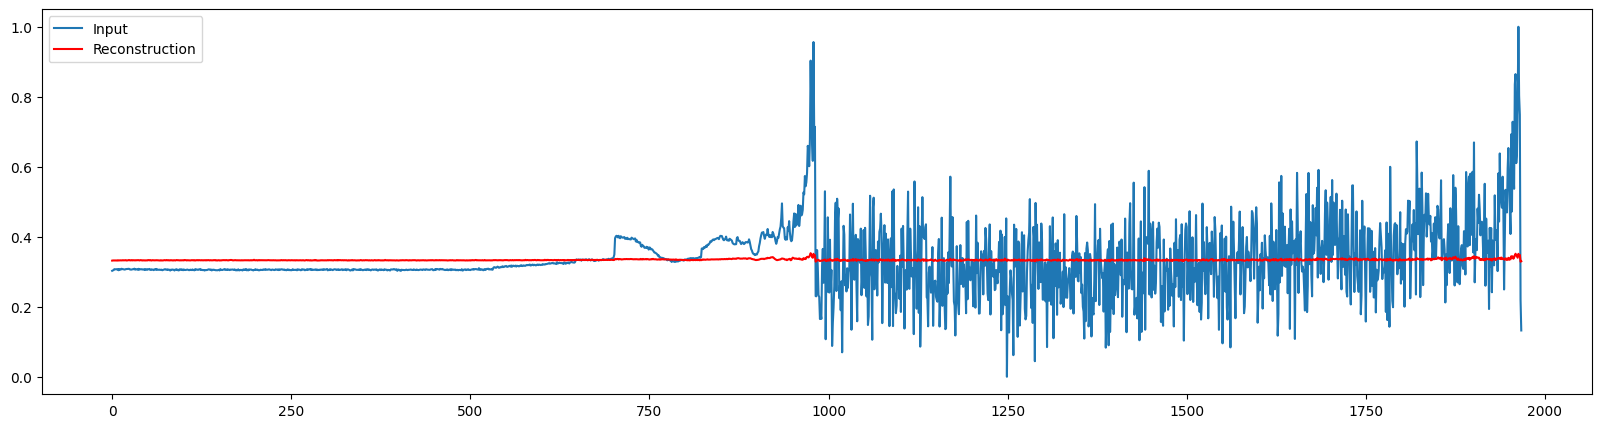

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

3


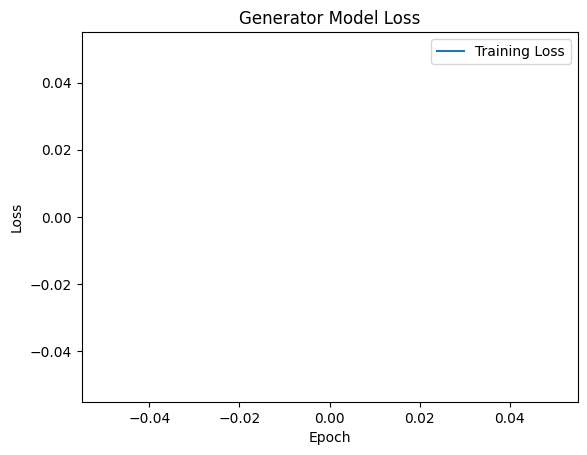

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][984:].values.tolist()   #generated signal
original = Mixed_set['RMS'][:984].values.tolist() #original signal
mixed = Mixed_set['RMS'][984:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

nan


#*__With 1D 2 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*_With 1D 3 CNN Layers - Leaky ReLU activation function_*



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten()
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))

In [ ]:
# #Calculate SNR Value

# noise =[]
# generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
# original = df['XDeviation'][3245:3318].values.tolist() #original signal
# mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

# length = len(original)
# for i in range(length):
#   noise.append(original[i] - mixed[i])

# snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
# print(snr)

#*_With 1D 3 CNN Layers - Leaky ReLU activation function_*



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten()
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))

In [ ]:
# #Calculate SNR Value

# noise =[]
# generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
# original = df['XDeviation'][3245:3318].values.tolist() #original signal
# mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

# length = len(original)
# for i in range(length):
#   noise.append(original[i] - mixed[i])

# snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
# print(snr)

#*_With 1D 2 CNN Layers & 2 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(6,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax'),
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*_With 1D 2 CNN Layers & 2 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(5,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(10, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 3 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 3 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

# *_With 1D 4 CNN Layers - Leaky ReLU activation function_*



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten(), 
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))

In [ ]:
# #Calculate SNR Value

# noise =[]
# generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
# original = df['XDeviation'][3245:3318].values.tolist() #original signal
# mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

# length = len(original)
# for i in range(length):
#   noise.append(original[i] - mixed[i])

# snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
# print(snr)

#*_With 1D 4 CNN Layers - Leaky ReLU activation function_*



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten(), 
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))

In [ ]:
# #Calculate SNR Value

# noise =[]
# generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
# original = df['XDeviation'][3245:3318].values.tolist() #original signal
# mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

# length = len(original)
# for i in range(length):
#   noise.append(original[i] - mixed[i])

# snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
# print(snr)

#*__With 1D 3 CNN Layers & 2 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(3,activation='LeakyReLU')
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 3 CNN Layers & 2 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(5,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(10, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3318].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 4 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 4 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(10, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#**_With 1D 5 CNN Layers - Leaky ReLU activation function_**



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten(), 
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))

In [ ]:
# #Calculate SNR Value

# noise =[]
# generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
# original = df['XDeviation'][3245:3318].values.tolist() #original signal
# mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

# length = len(original)
# for i in range(length):
#   noise.append(original[i] - mixed[i])

# snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
# print(snr)

#**_With 1D 5 CNN Layers - Leaky ReLU activation function_**



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten(), 
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=12, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))